In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
baseball_2016 = "Documents/baseball_reference_2016.csv"
stadium_capacity = "Documents/Stadium_Cap.csv"
baseball_df = pd.read_csv(baseball_2016)
stadium_df = pd.read_csv(stadium_capacity)
baseball_df.rename(columns={'home_team':'Team'}, inplace=True)


In [3]:
merge_table = pd.merge(baseball_df, stadium_df, on="Team")


In [4]:
Attendance = merge_table.iloc[:,1]
Capacity = merge_table.iloc[:,28]
merge_table['Attendance Percentage'] = Attendance / Capacity
merge_table


,Unnamed: 0,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,field_type,game_type,Team,...,game_hours_dec,season,home_team_win,home_team_loss,home_team_outcome,Team_Code,Stadium,Capacity,City,Attendance Percentage
0,0,40030.0,New York Mets,1,7,3,4/3/2016,on grass,Night Game,Kansas City Royals,...,3.216667,regular season,1,0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",1.056117
1,84,33132.0,Atlanta Braves,2,7,1,5/13/2016,on grass,Night Game,Kansas City Royals,...,2.750000,regular season,1,0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.874126
2,143,33568.0,Detroit Tigers,0,13,10,6/16/2016,on grass,Night Game,Kansas City Royals,...,3.250000,regular season,0,1,Loss,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.885629
3,154,33546.0,Cleveland Indians,3,5,4,6/15/2016,on grass,Night Game,Kansas City Royals,...,2.783333,regular season,1,0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.885049
4,207,31144.0,Cleveland Indians,0,12,7,7/19/2016,on grass,Night Game,Kansas City Royals,...,2.766667,regular season,0,1,Loss,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.821676
5,234,35986.0,Toronto Blue Jays,0,5,2,8/6/2016,on grass,Night Game,Kansas City Royals,...,2.600000,regular season,1,0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.949424
6,269,30599.0,Minnesota Twins,1,5,1,8/18/2016,on grass,Night Game,Kansas City Royals,...,2.250000,regular season,1,0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.807298
7,272,32996.0,Minnesota Twins,1,8,1,8/21/2016,on grass,Day Game,Kansas City Royals,...,2.416667,regular season,1,0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.870538
8,294,25008.0,Detroit Tigers,2,13,7,9/2/2016,on grass,Night Game,Kansas City Royals,...,3.466667,regular season,0,1,Loss,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.659789
9,315,29318.0,Chicago White Sox,1,11,7,9/16/2016,on grass,Night Game,Kansas City Royals,...,3.000000,regular season,0,1,Loss,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.773501


In [5]:

bins = [0, 40, 45, 50,55,60,65,70,75,80,85, 90,95, 100,105]
group_names = ["0-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70","70-75","75-80","80-85","85-90","90-95","95-100","100-105"]
merge_table["Temperature Range"] = pd.cut(merge_table["temperature"], bins, labels=group_names)
avg_attend = merge_table.groupby("Temperature Range")["Attendance Percentage"].mean()
avg_attend = pd.DataFrame(avg_attend).reset_index()

avg_attend

,Temperature Range,Attendance Percentage
0,0-40,0.841270
1,40-45,0.701296
2,45-50,0.753593
3,50-55,0.612594
4,55-60,0.527995
5,60-65,0.578424
6,65-70,0.695352
7,70-75,0.698469
8,75-80,0.691862
9,80-85,0.726280


Text(0, 0.5, 'Attendance Percentage')

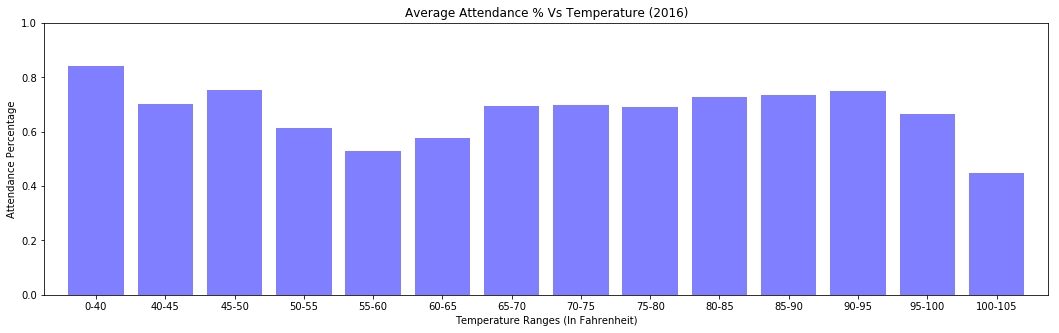

In [6]:
Attend_P = avg_attend.iloc[:,1]
x_axis = avg_attend.iloc[:,0]
plt.subplots(figsize=(18,5))
plt.bar(x_axis, Attend_P, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70","70-75","75-80","80-85","85-90","90-95","95-100","100-105"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 1)
plt.title("Average Attendance % Vs Temperature (2016)")
plt.xlabel("Temperature Ranges (In Fahrenheit)")
plt.ylabel("Attendance Percentage")
plt.savefig("Pictures/AttendanceVTempBar.png")

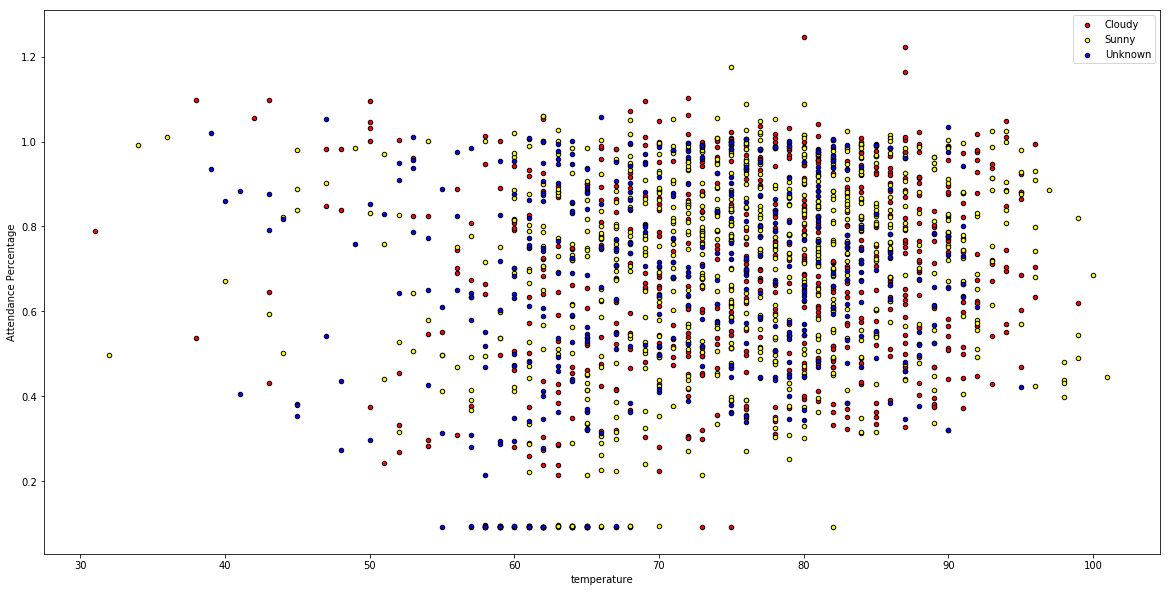

In [7]:
cloudy_group = merge_table.loc[merge_table['sky'] == 'Cloudy']
sunny_group = merge_table.loc[merge_table['sky'] == 'Sunny']
unknown_group = merge_table.loc[merge_table['sky'] == 'Unknown']

x1 = cloudy_group.plot(kind="scatter", x="temperature", y="Attendance Percentage", grid=True, figsize=(20,10),
                       label = 'Cloudy', color = 'Red', edgecolor = "black", linewidths = 1)    
x2 = sunny_group.plot(kind='scatter', x='temperature', y='Attendance Percentage', 
                          color='Yellow', label = 'Sunny', edgecolor = "black", linewidths = 1, ax=x1)
x3 = unknown_group.plot(kind='scatter', x='temperature', y='Attendance Percentage', 
                          color='blue', label = 'Unknown', edgecolor = "black", linewidths = 1, ax=x1) 



In [ ]:
night_group = merge_table.loc[merge_table['game_type'] == 'Night Game']
day_group = merge_table.loc[merge_table['game_type'] == 'Day Game']


x1 = night_group.plot(kind="scatter", x="temperature", y="Attendance Percentage", grid=True, figsize=(20,10), color='yellow',
                       label = 'Night Game', edgecolor = "black", linewidths = 1)    
x2 = day_group.plot(kind='scatter', x='temperature', y='Attendance Percentage', 
                          color='red', label = 'Day Game', edgecolor = "black", linewidths = 1,figsize=(20,10), ax=x1)